In [1]:
# %load /Users/Jonathan/.je.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import glob
from os.path import join, isfile
# -------------------------------------------------------------------------------------
from nilearn import plotting, image;
from nilearn.masking import compute_epi_mask
import nibabel as nib
from nilearn.input_data import NiftiMasker
import time
# -------------------------------------------------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.cross_validation import LeaveOneLabelOut, cross_val_score
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.externals import joblib
# -------------------------------------------------------------------------------------
plt.rcParams['figure.figsize'] = 12,6

/home/jerez/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/jerez/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [1]:
# SUBJECTS = ['S12']
SUBJECTS = ['S01','S02','S03','S04','S05','S06','S07','S08','S09','S10','S11','S12']
RUNS = range(1,7)
PATH = '/imaging/ourlab/jerez/memcon/'
PERCENTILE = 5
CV = 5

In [3]:
from helper_functions import apply_niftiMasker, load_scanning_session_matrix, get_onsets, plot_classification_accuracies
from classification import compute_classification

### Classification: within, all runs, featureSelection, +shuffled

In [ ]:
# Classify using all runs
df = pd.DataFrame(columns=['Subject','classification_accuracy','classification_accuracy_reshuffled'])
for i,s in enumerate(SUBJECTS):
    if s == 'S11':
        RUNS = range(1,6)
    else:
        RUNS = range(1,7)
    print s,

    Z = load_scanning_session_matrix(s)
    df_onsets = get_onsets(s,RUNS)
    
    (clf,classification_accuracy) = compute_classification(Z,df_onsets,CV,PERCENTILE)
    (clf_shuffled,classification_accuracy_shuffled) = compute_classification(Z,df_onsets,CV,PERCENTILE,randomize_labels=True)
    df.loc[i] = [s,classification_accuracy,classification_accuracy_shuffled]
    #joblib.dump(clf,'models/' +s +'_within_featSelec_GM.pkl')
df

In [5]:
df_onsets.shape

(96, 3)

In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style("whitegrid")
# tips = sns.load_dataset("tips")
# ax = sns.swarmplot(x="day", y="total_bill", data=tips)
# ax = sns.boxplot(x="day", y="total_bill", data=tips,
#         showcaps=False,boxprops={'facecolor':'None'},
#         showfliers=False,whiskerprops={'linewidth':0})

# plt.show()

In [7]:
# def plot_classification_accuracies(df):
    
#     import scipy as sp
#     print sp.stats.ttest_rel(df['classification_accuracy'],df['classification_accuracy_reshuffled'])
    
#     n_subjects = df.shape[0]
    
#     newdf = pd.concat([pd.Series(['classification_accuracy']*n_subjects),df['classification_accuracy']],axis=1,ignore_index=True)
#     q = pd.concat([pd.Series(['classification_accuracy_reshuffled']*n_subjects),df['classification_accuracy_reshuffled']],axis=1,ignore_index=True)
#     newdf = newdf.append([q],ignore_index=True)

#     newdf.columns = ['temp','accuracy']
#     ax1 = sns.swarmplot(x = 'temp',y = 'accuracy',data = newdf,size=8)
#     ax2 = sns.boxplot(x = 'temp',y = 'accuracy',data = newdf,
#             showcaps=False,boxprops={'facecolor':'None'},
#             showfliers=False,whiskerprops={'linewidth':0})
#     ax1.set_xlabel('')
#     ax1.tick_params(axis='both', labelsize=14)
#     ax1.set_ylabel('Accuracy',fontsize=14)

Ttest_relResult(statistic=8.4224728345003061, pvalue=3.9913795737566824e-06)


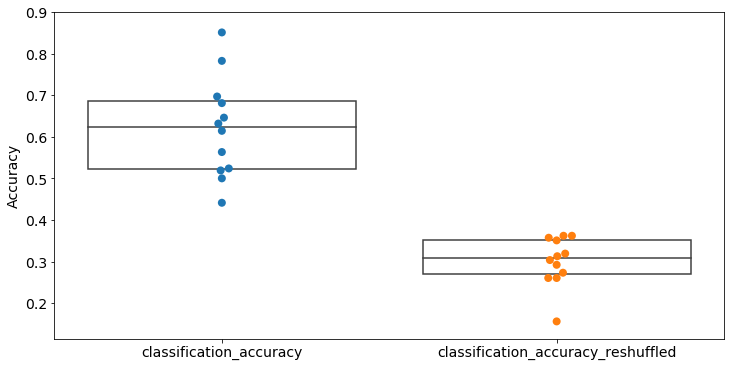

In [8]:
plot_classification_accuracies(df)